## Visuals

In [1]:
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [2]:
db = pd.read_csv('clean_data_complete.csv')

In [3]:
db

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0
96120,nacional,presencial,griselda rodriguez rojas,inpi,NaN,adquisiciones,41,adjudicacion,1,0,...,0,1,0,8,12,13,55,0,0,0


In [4]:
db.dtypes

Caracter del procedimiento                  object
Forma del procedimiento                     object
Operador                                    object
Correo electronico                          object
Entidad federativa                          object
Tipo de contratacion                        object
Articulo                                    object
Plantilla                                   object
Forma_Procedimiento_Presencial               int64
Forma_Procedimiento_Electronica              int64
Forma_Procedimiento_Mixta                    int64
Entidad_federativa_Norte                     int64
Entidad_federativa_Centro                    int64
Entidad_federativa_Golfo                     int64
Entidad_federativa_PacificoSur               int64
Entidad_federativa_Sur                       int64
Entidad_federativa_PacificoNorte             int64
Caracter del procedimiento_Nacional          int64
Caracter del procedimiento_Internacional     int64
Articulo de excepcion_41       

# Plot 1 - 1 item  

Target Class:  “Forma_Procedimiento_Electronica” == 1  
Complement Class :  “Forma_Procedimiento_Electronica” == 0  

{(Most_used_UC_word_gyr == '1')}

In [50]:
form_percentages = db.groupby(['Forma del procedimiento']).mean()['Most_used_UC_word_gyr']*100
form_percentages = pd.DataFrame({'Forma del procedimiento':form_percentages.index,'Percentage of objects that include the word gyr':form_percentages.values})
form_percentages

,Forma del procedimiento,Percentage of objects that include the word gyr
0,electronica,38.701299
1,mixta,13.526099
2,presencial,4.528574


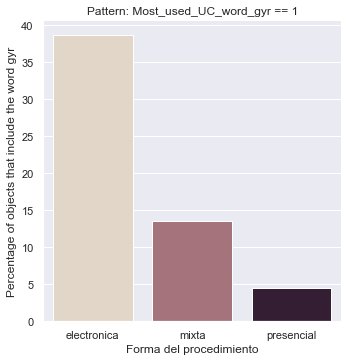

In [55]:
#Plotting 1 item
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=form_percentages,
    x='Forma del procedimiento',
    y='Percentage of objects that include the word gyr',
    palette="ch:.25",
    kind='bar'
    )
plt.title('Pattern: Most_used_UC_word_gyr == 1')
plt.show()

# Plot 1 - 2 item  

Class 0: “Plantilla ” != “Adjudicacion”  
Class 1: “Plantilla ” == “Adjudicacion”  
  
(Tipo_de_contratacion != 'obra publica') AND (Caracter_del_procedimiento != 'otro')


In [146]:
plantilla_most_common = db[['Caracter del procedimiento','Tipo de contratacion','Plantilla']].dropna().groupby(['Caracter del procedimiento','Tipo de contratacion']).agg(lambda x:x.value_counts().index[0])
plantilla_most_common = plantilla_most_common.reset_index().rename(columns={'Plantilla':'Most Common Plantilla'})
plantilla_most_common

,Caracter del procedimiento,Tipo de contratacion,Most Common Plantilla
0,internacional,adquisiciones,adjudicacion
1,internacional,arrendamientos,adjudicacion
2,internacional,obra publica,licitacion
3,internacional,servicios,adjudicacion
4,internacional,servicios relacionados con la op,adjudicacion
5,internacional abierto,adquisiciones,adjudicacion
6,internacional bajo tlc,adquisiciones,adjudicacion
7,internacional bajo tlc,arrendamientos,adjudicacion
8,internacional bajo tlc,obra publica,licitacion
9,internacional bajo tlc,servicios,adjudicacion


In [95]:
plantilla_percentages['Plantilla_Adjudicación']

Caracter del procedimiento  Tipo de contratacion            
internacional               adquisiciones                        4786
                            arrendamientos                          6
                            obra publica                            0
                            servicios                             153
                            servicios relacionados con la op        2
internacional abierto       adquisiciones                           2
internacional bajo tlc      adquisiciones                        5437
                            arrendamientos                         12
                            obra publica                            1
                            servicios                             166
nacional                    adquisiciones                       31384
                            arrendamientos                        554
                            obra publica                         1850
                            s

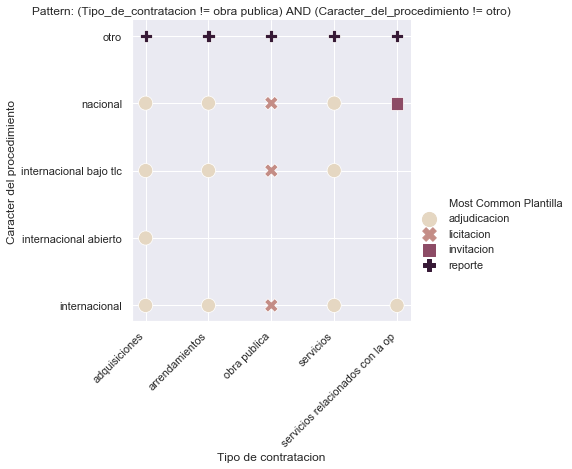

In [147]:
chart = sns.relplot(
    data=plantilla_most_common,
    x='Tipo de contratacion',
    palette="ch:.25",
    hue = 'Most Common Plantilla',
    style = 'Most Common Plantilla',
    size = 'Most Common Plantilla',
    y = 'Caracter del procedimiento',
    aspect = 1.3,
    height = 5,
    sizes = (150, 200),
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
#chart.set_yticklabels( rotation=-45, horizontalalignment='right')
plt.title('Pattern: (Tipo_de_contratacion != obra publica) AND (Caracter_del_procedimiento != otro)')
plt.savefig('Plot1-2-Michael.jpg', bbox_inches='tight')
plt.show()

In [56]:
db[(db['Most_used_description_word_material'] == 0) & (db['Most_used_UC_word_gyr'] == 0) & (db['Articulo'] != 42) & (db['Tipo de contratacion'] != 'servicios') ]

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96116,otro,electronica,patricia xospa villeda,semar,NaN,adquisiciones,NaN,reporte,0,1,...,0,0,0,8,6,13,55,0,0,1
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0


&lt;seaborn.axisgrid.FacetGrid at 0x7f9bce769e10&gt;

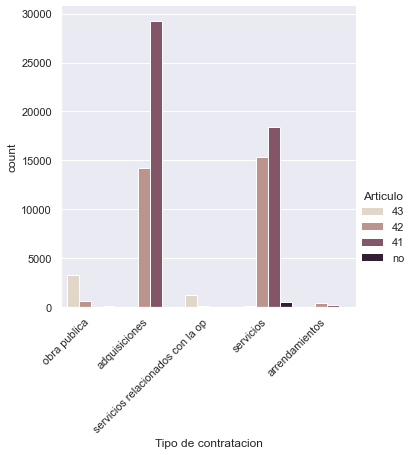

In [59]:
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=db,
    x='Tipo de contratacion',
    kind = 'count',
    palette="ch:.25",
    hue = 'Articulo'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')

[Text(0, 0, &#39;sur&#39;),
 Text(0, 0, &#39;bajio&#39;),
 Text(0, 0, &#39;golfo&#39;),
 Text(0, 0, &#39;centro&#39;),
 Text(0, 0, &#39;norte&#39;),
 Text(0, 0, &#39;pacifico norte&#39;),
 Text(0, 0, &#39;pacifico sur&#39;)]

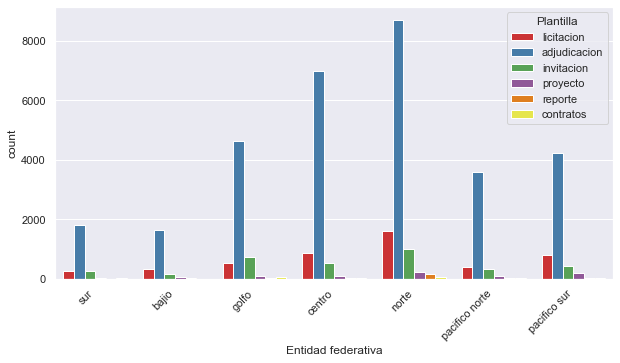

In [43]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=db,
    x='Entidad federativa',
    hue = 'Plantilla',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')